<h1><center> 
     Step-by-step example of hvsrprocpy outputs
</center></h1>
<center>
    By: Francisco Javier G. Ornelas (jornela1@ucla.edu)<br>Originally created: Apr. 28, 2024<br>
</center>
<center>
    This jupyter notebook will walk you through the various functions that are contained in the tdt, fdt, and hvt libraries.
</center>

# Download the python library if not already done so

In [ ]:
# pip install hvsrprocpy

# Load in the necessary python libraries

In [22]:
import hvsrprocpy as hv
import matplotlib.pyplot as plt
import numpy as np

# If you need help, see below:

In [56]:
# help(hv.fdt)

# Create numpy arrays from microtremor recording

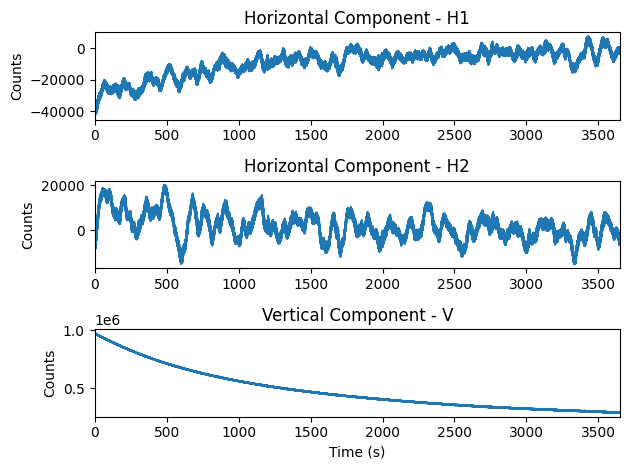

In [71]:
#Specify directory where .txt or .mseed files are stored
direc = r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\mHVSR Site Inv\VSPDB Data\CA Vertical Array Data\HVSRdata\2\2.250.2\Text_File_data\Raw_mseed_PEG_HH'

#Specify filenames of .mseed or .txt files
h1 = 'NX.USC6..HHE.D.2022.250'
h2 = 'NX.USC6..HHN.D.2022.250'
v = 'NX.USC6..HHZ.D.2022.250'

#specify where you want output to be stored
output_dir = r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\mHVSR Site Inv\HVSR VSPDB Data'

#Get arrays of each component
h1, h2, v, dt, time = hv.process_time_series(h1_fn=h1, h2_fn=h2, v_fn=v, directory=direc, 
                                                       file_type=1, time_cut=120)

N = np.min([len(h1), len(h2), len(v)])

time = time[:N]
h1 = h1[:N]
h2 = h2[:N]
v = v[:N]

plt.figure()
plt.subplot(311)
plt.title('Horizontal Component - H1')
plt.plot(time, h1)
plt.ylabel('Counts')
plt.xlim(0, max(time))
plt.subplot(312)
plt.title('Horizontal Component - H2')
plt.plot(time, h2)
plt.ylabel('Counts')
plt.xlim(0, max(time))
plt.subplot(313)
plt.title('Vertical Component - V')
plt.plot(time, v)
plt.xlabel('Time (s)')
plt.ylabel('Counts')
plt.xlim(0, max(time))

plt.tight_layout()


# Detrend entire time series

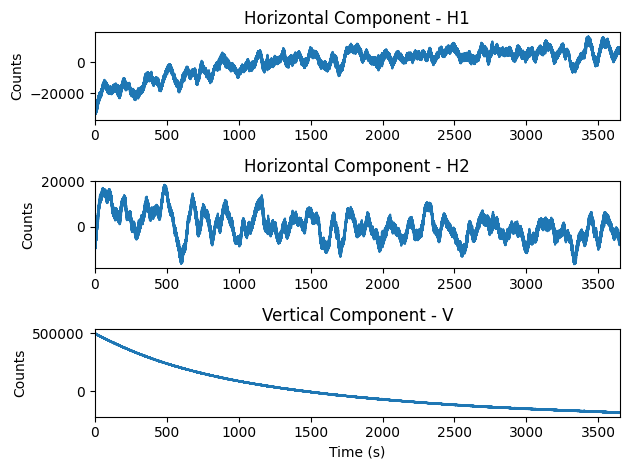

In [61]:
#Detrend time series arrays for each component
h1_det = hv.detrend_ts(h1, detrend_type = 1)
h2_det = hv.detrend_ts(h2, detrend_type = 1)
v_det = hv.detrend_ts(v, detrend_type = 1)

plt.figure()
plt.subplot(311)
plt.title('Horizontal Component - H1')
plt.plot(time, h1_det)
plt.ylabel('Counts')
plt.xlim(0, max(time))
plt.subplot(312)
plt.title('Horizontal Component - H2')
plt.plot(time, h2_det)
plt.ylabel('Counts')
plt.xlim(0, max(time))
plt.subplot(313)
plt.title('Vertical Component - V')
plt.plot(time, v_det)
plt.xlabel('Time (s)')
plt.ylabel('Counts')
plt.xlim(0, max(time))

plt.tight_layout()

# Apply tukey window to entire time series

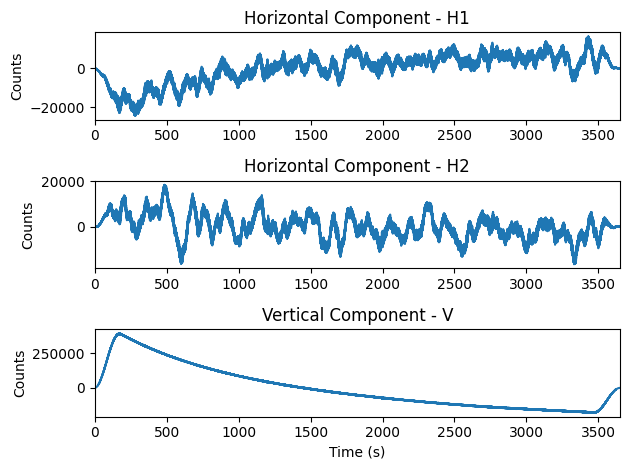

In [62]:
#Apply a tukey windowing function to each component
h1_tap = hv.tukey_window(h1_det)
h2_tap = hv.tukey_window(h2_det)
v_tap = hv.tukey_window(v_det)

plt.figure()
plt.subplot(311)
plt.title('Horizontal Component - H1')
plt.plot(time, h1_tap)
plt.ylabel('Counts')
plt.xlim(0, max(time))
plt.subplot(312)
plt.title('Horizontal Component - H2')
plt.plot(time, h2_tap)
plt.ylabel('Counts')
plt.xlim(0, max(time))
plt.subplot(313)
plt.title('Vertical Component - V')
plt.plot(time, v_tap)
plt.xlabel('Time (s)')
plt.ylabel('Counts')
plt.xlim(0, max(time))

plt.tight_layout()

# Apply filter to entire time series

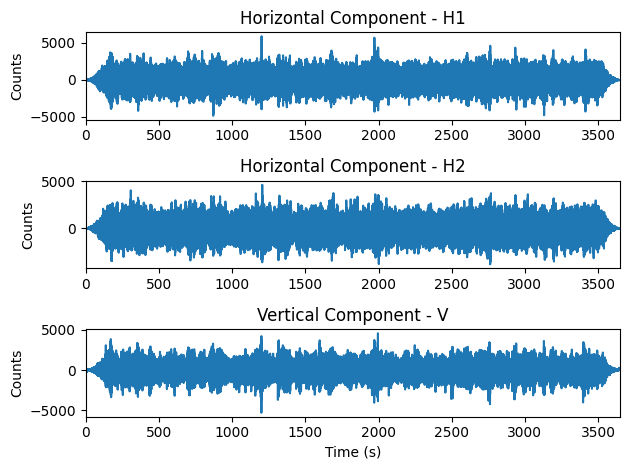

In [63]:
#Apply a high-pass butterworth filter to each component
h1_filt, h1_dict = hv.apply_filter(h1_tap, ts_dt = dt, fc = 0.042, npole = -5, is_causal = False, order_zero_padding = 0)
h2_filt, h2_dict = hv.apply_filter(h2_tap, ts_dt = dt, fc = 0.042, npole = -5, is_causal = False, order_zero_padding = 0)
v_filt, v_dict = hv.apply_filter(v_tap, ts_dt = dt, fc = 0.042, npole = -5, is_causal = False, order_zero_padding = 0)

N = np.min([len(h1_filt), len(h2_filt), len(v_filt)])

time = time[:N]
h1_filt = h1_filt[:N]
h2_filt = h2_filt[:N]
v_filt = v_filt[:N]

plt.figure()
plt.subplot(311)
plt.title('Horizontal Component - H1')
plt.plot(time, h1_filt)
plt.ylabel('Counts')
plt.xlim(0, max(time))
plt.subplot(312)
plt.title('Horizontal Component - H2')
plt.plot(time, h2_filt)
plt.ylabel('Counts')
plt.xlim(0, max(time))
plt.subplot(313)
plt.title('Vertical Component - V')
plt.plot(time, v_filt)
plt.xlabel('Time (s)')
plt.ylabel('Counts')
plt.xlim(0, max(time))

plt.tight_layout()

# Split data into discrete time windows

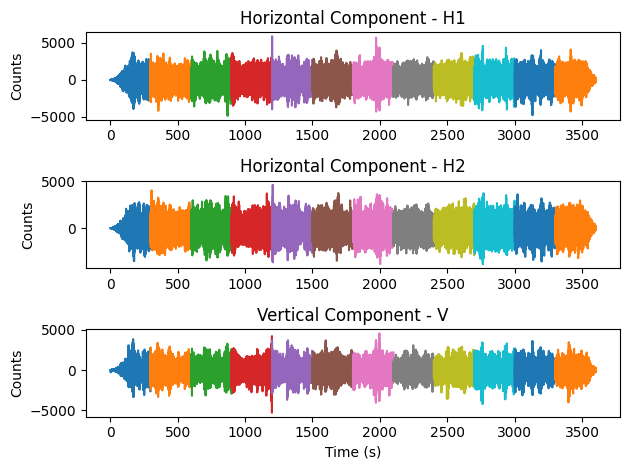

In [67]:
#Split the time series data into individual discrete time windows

#specify the window width
win_width = 300
#specify how much overlapping
overlapping = 0

t_win = hv.split_into_windows(time, dt, win_width, overlapping)
h1_win = hv.split_into_windows(h1_filt, dt, win_width, overlapping)
h2_win = hv.split_into_windows(h2_filt, dt, win_width, overlapping)
v_win = hv.split_into_windows(v_filt, dt, win_width, overlapping)

plt.figure()
for i in range(len(h1_win)):
    plt.subplot(311)
    plt.title('Horizontal Component - H1')
    plt.plot(t_win[i], h1_win[i])
    plt.ylabel('Counts')
    plt.subplot(312)
    plt.title('Horizontal Component - H2')
    plt.plot(t_win[i], h2_win[i])
    plt.ylabel('Counts')
    plt.subplot(313)
    plt.title('Vertical Component - V')
    plt.plot(t_win[i], v_win[i])
    plt.xlabel('Time (s)')
    plt.ylabel('Counts')

plt.tight_layout()    
    

# Process time series data to get HVSR and FAS curves

In [68]:
# Compute HVSR and FAS

# Get combined horizontal component
fas_h, freq = hv.compute_horizontal_combination(h1_sub=h1_win, h2_sub=h2_win, dt=dt, horizontal_comb = 'geometric_mean')

fas_v = np.fft.rfft(v_win)

#Smooth the horizontal and vertical component
fc = np.logspace(-2, 2, 1000)
h_smooth = hv.smooth_fas(fc=fc, fas=fas_h, freq=freq, ko_smooth_b = 20)
v_smooth = hv.smooth_fas(fc=fc, fas=fas_v, freq=freq, ko_smooth_b = 20)

#Compute HVSR by taking the ratio
hvsr = np.divide(h_smooth,v_smooth)

#Compute the smoothed fas for each horizontal component for plotting
fas_h1 = np.fft.rfft(h1_win)
fas_h2 = np.fft.rfft(h2_win)

h1_smooth = hv.smooth_fas(fc=fc, fas=fas_h1, freq=freq)
h2_smooth = hv.smooth_fas(fc=fc, fas=fas_h, freq=freq)

# Get median FAS curves 

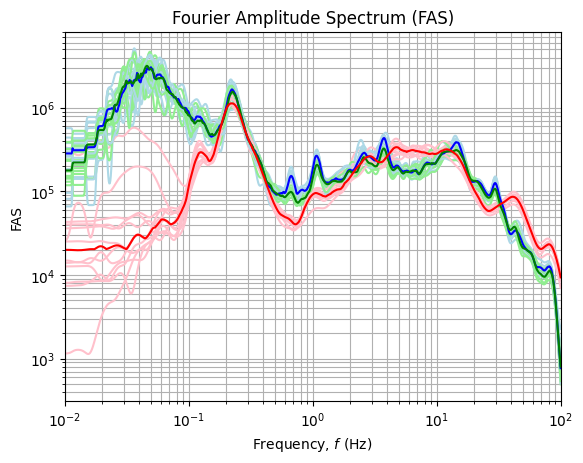

In [69]:
h1_smooth_med = np.median(h1_smooth, axis = 0)
h2_smooth_med = np.median(h2_smooth, axis = 0)
v_smooth_med = np.median(v_smooth, axis = 0)

plt.figure()
plt.title('Fourier Amplitude Spectrum (FAS)')
plt.xlim(min(fc), max(fc))

for i in range(len(h1_smooth)):
    plt.loglog(fc, h1_smooth[i], color = 'lightblue')
    plt.loglog(fc, h2_smooth[i], color = 'lightgreen')
    plt.loglog(fc, v_smooth[i], color = 'pink')

plt.loglog(fc, h1_smooth_med, color = 'blue')
plt.loglog(fc, h2_smooth_med, color = 'green')
plt.loglog(fc, v_smooth_med, color = 'red')

plt.ylabel('FAS')
plt.xlabel('Frequency, $f$ (Hz)')

plt.grid(True, which = 'both')
    
    

# Get median HVSR curve

(0.0, 8.0)

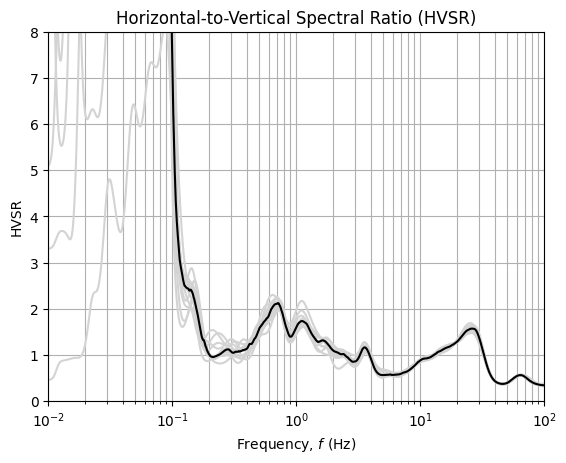

In [70]:
HVSR_med = np.median(hvsr, axis = 0)

plt.figure()
plt.title('Horizontal-to-Vertical Spectral Ratio (HVSR)')
plt.xlim(min(fc), max(fc))

for i in range(len(hvsr)):
    plt.semilogx(fc, hvsr[i], color = 'lightgray')

plt.semilogx(fc, HVSR_med, color = 'black')

plt.ylabel('HVSR')
plt.xlabel('Frequency, $f$ (Hz)')

plt.grid(True, which = 'both')

plt.ylim(0,8)